# Eighth Data Preparation Process

In this notebook file, the dataset provided by the customer will be eddited for general purposes.

Outliers will be examined and processed.

In [1]:
#Libraries are being imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlibVersion
import seaborn as sns

In [2]:
#Library versions are being printed
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlibVersion)
print('seaborn Version: ' + sns.__version__)

pandas Version: 1.5.2
matplotlib Version: 3.6.2
seaborn Version: 0.12.1


In [3]:
#Settings for Graphic Libraries are being made
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
#A pandas dataframe named as dataFrame is being created by reading the data pkl file created last process
dataFrame = pd.read_pickle("../Data/OutputPreparation/FabricWaste.pkl")
dataFrame.head()

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
0,18,0,2SP050,False,125,150,4,35,3,375,...,0.064198,6,4,0,1,1,0,0,6,25
1,19,0,2SP050,False,125,150,4,65,3,375,...,0.060386,3,0,2,1,0,0,0,3,23
2,6,0,2SP050,False,125,150,4,65,3,375,...,0.077121,11,1,5,2,1,1,1,11,30
3,20,0,2SP050,False,125,150,4,65,3,375,...,0.062802,8,0,4,2,2,0,0,8,25
4,2,0,2SP050,False,125,150,4,65,3,375,...,0.045894,3,0,3,0,0,0,0,3,18


In [5]:
#Information of dataframe is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ColorID                  205 non-null    int64  
 1   ProductDetailID          205 non-null    int64  
 2   FabricCode               205 non-null    object 
 3   IsManualProcess          205 non-null    bool   
 4   Weight                   205 non-null    int64  
 5   Width                    205 non-null    int64  
 6   ProductPart              205 non-null    int64  
 7   NotchLayer               205 non-null    int64  
 8   NotchQuantity            205 non-null    int64  
 9   OrderQuantity            205 non-null    int64  
 10  PrintErrorRate           205 non-null    float64
 11  SewingErrorRate          205 non-null    float64
 12  FabricStainRate          205 non-null    float64
 13  FabricErrorRate          205 non-null    float64
 14  EmbroideryErrorRate      2

In [6]:
#Statistical information of the columns to be worked on is being printed
dataFrame.loc[:, 'Weight' : 'DefectRate'].describe()

,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,PrintErrorRate,SewingErrorRate,FabricStainRate,FabricErrorRate,EmbroideryErrorRate,MeasureErrorRate,SecondQualityRate,DefectRate
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,171.317073,161.287805,4.902439,63.912195,2.853659,520.780488,0.003994,0.015776,0.000841,0.004664,0.000566,0.000979,0.026820,0.046573
std,45.244130,16.866840,2.439512,73.029151,1.568079,806.261723,0.008120,0.016576,0.002325,0.007171,0.002683,0.004053,0.022138,0.027090
min,125.000000,120.000000,2.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002262,0.005587
25%,125.000000,150.000000,4.000000,33.000000,2.000000,210.000000,0.000000,0.004831,0.000000,0.000000,0.000000,0.000000,0.013393,0.028571
50%,175.000000,165.000000,4.000000,44.000000,3.000000,270.000000,0.000000,0.010000,0.000000,0.002262,0.000000,0.000000,0.020833,0.038877
75%,190.000000,172.000000,5.000000,66.000000,3.000000,400.000000,0.004274,0.020362,0.000000,0.006046,0.000000,0.000000,0.032787,0.060386
max,320.000000,195.000000,14.000000,610.000000,14.000000,6000.000000,0.044643,0.124352,0.015544,0.041667,0.026042,0.044643,0.165803,0.165803


<AxesSubplot: >

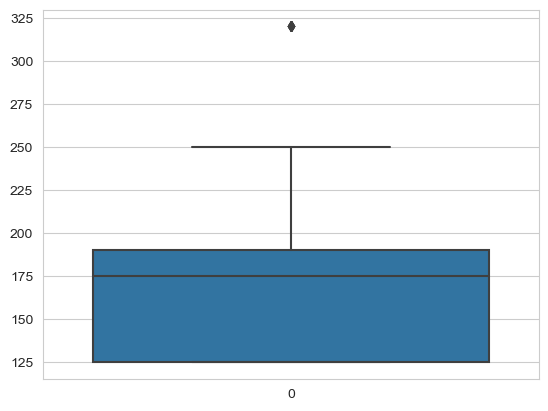

In [7]:
#A boxplot, to check the Weight distribution is being plotted
sns.boxplot(data = dataFrame['Weight'])

In [8]:
#outlier Weight values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['Weight'] > 300 ]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
184,34,20,2FT098,False,320,190,11,135,4,1645,...,0.026020,30,17,12,1,0,0,0,30,44
185,35,21,2FT098,False,320,190,11,210,6,2305,...,0.045143,65,16,35,1,15,0,0,67,107
186,37,20,2FT098,False,320,190,7,195,5,2100,...,0.036685,67,15,6,0,33,15,0,69,80
187,34,23,2FT098,False,320,190,8,65,3,595,...,0.028571,13,9,4,0,1,0,0,14,18
189,38,20,2FT304,False,320,195,4,190,5,1995,...,0.034060,59,29,15,3,10,0,3,60,70
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87
203,37,20,2FT052,False,320,190,13,145,5,1545,...,0.012865,8,2,6,0,0,0,0,8,20


<AxesSubplot: >

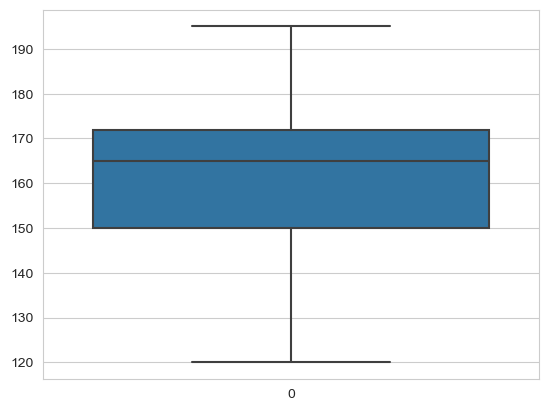

In [9]:
#A boxplot, to check the Width distribution is being plotted
sns.boxplot(data = dataFrame['Width'])

In [10]:
#There is no outlier for Width column

<AxesSubplot: >

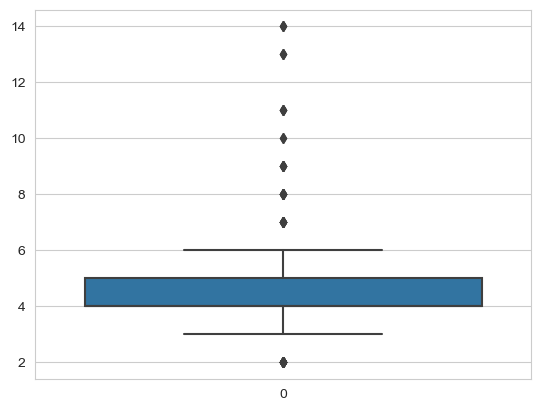

In [11]:
#A boxplot, to check the ProductPart distribution is being plotted
sns.boxplot(data = dataFrame['ProductPart'])

In [12]:
#outlier ProductPart values even after a tolerance amount is added, are being examined
dataFrame[(dataFrame['ProductPart'] < 2) | (dataFrame['ProductPart'] > 10) ]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
57,29,1,2SP021,False,125,160,11,67,3,400,...,0.038265,10,0,8,0,3,0,0,11,16
70,29,19,2SP021,False,125,160,11,44,3,200,...,0.057143,6,0,6,0,0,0,0,6,12
83,11,3,2SP061,False,190,172,13,50,3,320,...,0.013966,5,0,4,0,1,0,0,5,5
88,26,1,2SP061,False,190,172,14,66,3,280,...,0.053030,13,0,10,0,2,0,2,14,16
89,2,1,2SP061,False,190,172,14,66,3,280,...,0.057692,9,0,1,0,8,0,0,9,17
90,4,1,2SP061,False,190,172,14,66,3,280,...,0.041667,10,0,9,0,2,0,0,11,13
184,34,20,2FT098,False,320,190,11,135,4,1645,...,0.026020,30,17,12,1,0,0,0,30,44
185,35,21,2FT098,False,320,190,11,210,6,2305,...,0.045143,65,16,35,1,15,0,0,67,107
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87
203,37,20,2FT052,False,320,190,13,145,5,1545,...,0.012865,8,2,6,0,0,0,0,8,20


<AxesSubplot: >

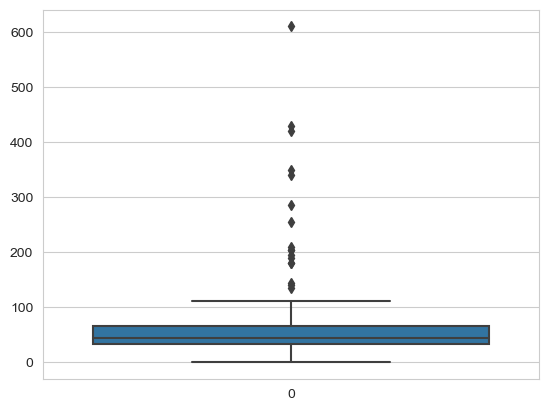

In [13]:
#A boxplot, to check the NotchLayer distribution is being plotted
sns.boxplot(data = dataFrame['NotchLayer'])

In [14]:
#outlier NotchLayer values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['NotchLayer'] > 300]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
193,45,6,2SP192,False,175,180,4,420,9,4395,...,0.031651,123,93,26,2,3,0,0,124,143
194,46,6,2SP192,False,175,180,4,350,9,3900,...,0.026101,73,26,36,2,10,0,0,74,104
195,35,6,2SP192,False,175,180,4,430,10,4500,...,0.073304,302,195,86,19,2,0,1,303,353
200,42,6,2SP206,False,175,180,4,610,14,6000,...,0.032400,127,80,29,8,7,4,0,128,199
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87


<AxesSubplot: >

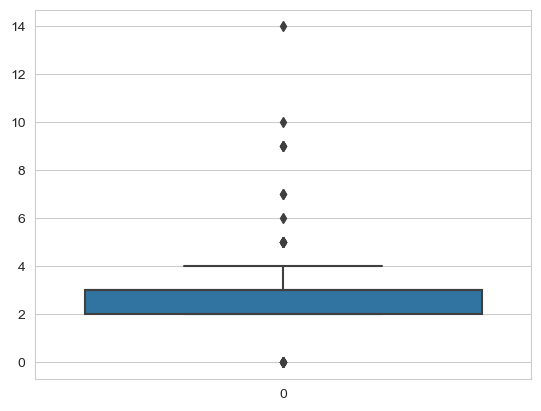

In [15]:
#A boxplot, to check the NotchQuantity distribution is being plotted
sns.boxplot(data = dataFrame['NotchQuantity'])

In [16]:
#outlier NotchQuantity values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['NotchQuantity'] > 8]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
193,45,6,2SP192,False,175,180,4,420,9,4395,...,0.031651,123,93,26,2,3,0,0,124,143
194,46,6,2SP192,False,175,180,4,350,9,3900,...,0.026101,73,26,36,2,10,0,0,74,104
195,35,6,2SP192,False,175,180,4,430,10,4500,...,0.073304,302,195,86,19,2,0,1,303,353
200,42,6,2SP206,False,175,180,4,610,14,6000,...,0.032400,127,80,29,8,7,4,0,128,199
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87


<AxesSubplot: >

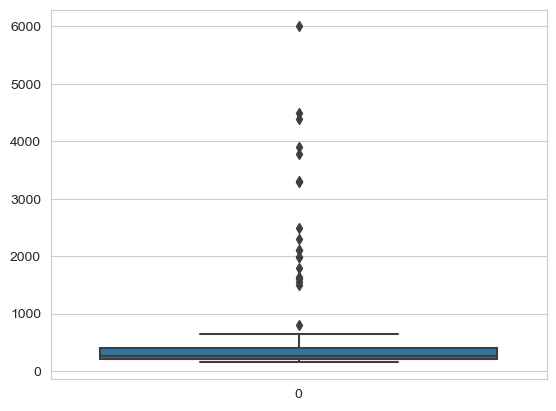

In [17]:
#A boxplot, to check the OrderQuantity distribution is being plotted
sns.boxplot(data = dataFrame['OrderQuantity'])

In [18]:
#outlier OrderQuantity values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['OrderQuantity'] > 3000]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
193,45,6,2SP192,False,175,180,4,420,9,4395,...,0.031651,123,93,26,2,3,0,0,124,143
194,46,6,2SP192,False,175,180,4,350,9,3900,...,0.026101,73,26,36,2,10,0,0,74,104
195,35,6,2SP192,False,175,180,4,430,10,4500,...,0.073304,302,195,86,19,2,0,1,303,353
196,36,6,2SP206,False,175,180,4,255,7,3305,...,0.018151,47,35,3,3,7,0,0,48,61
198,33,6,2SP206,False,175,180,4,285,7,3300,...,0.033786,102,38,22,0,43,0,0,103,115
200,42,6,2SP206,False,175,180,4,610,14,6000,...,0.032400,127,80,29,8,7,4,0,128,199
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87


<AxesSubplot: >

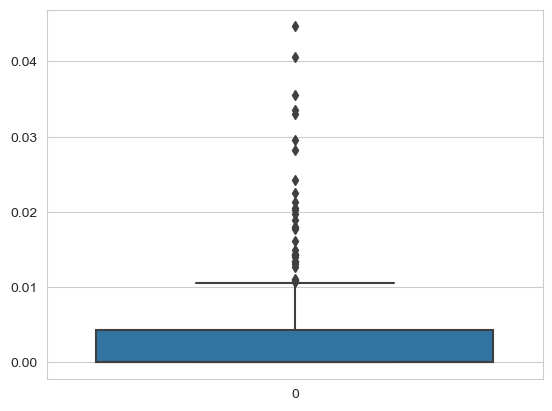

In [19]:
#A boxplot, to check the PrintErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['PrintErrorRate'])

In [20]:
#outlier PrintErrorRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['PrintErrorRate'] > 0.03]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
18,6,0,2SP050,False,125,150,3,52,3,220,...,0.057778,10,9,2,0,0,0,0,11,14
129,15,0,2RB201,False,175,120,4,34,2,300,...,0.059524,16,15,1,0,1,0,0,17,19
151,24,11,2SP033,False,190,170,4,36,3,160,...,0.044693,8,6,2,0,0,0,0,8,8
167,5,16,2SP033,False,190,170,3,28,2,215,...,0.136364,29,9,18,3,2,0,0,32,34
195,35,6,2SP192,False,175,180,4,430,10,4500,...,0.073304,302,195,86,19,2,0,1,303,353


<AxesSubplot: >

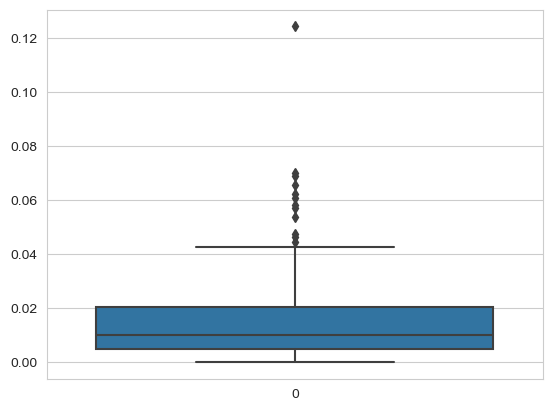

In [21]:
#A boxplot, to check the SewingErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['SewingErrorRate'])

In [22]:
#outlier SewingErrorRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['SewingErrorRate'] > 0.08]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
55,8,4,2SP021,False,125,160,9,31,2,250,...,0.165803,50,0,38,5,7,0,2,52,50


<AxesSubplot: >

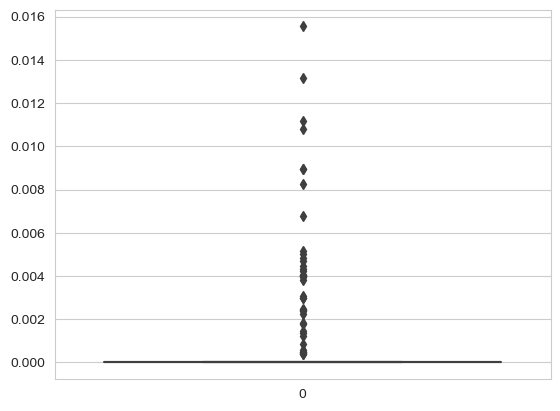

In [23]:
#A boxplot, to check the FabricStainRate distribution is being plotted
sns.boxplot(data = dataFrame['FabricStainRate'])

In [24]:
#outlier FabricStainRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['FabricStainRate'] > 0.005]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
2,6,0,2SP050,False,125,150,4,65,3,375,...,0.077121,11,1,5,2,1,1,1,11,30
30,4,1,2SP050,False,125,150,8,111,4,550,...,0.051753,23,0,13,3,5,0,3,24,30
55,8,4,2SP021,False,125,160,9,31,2,250,...,0.165803,50,0,38,5,7,0,2,52,50
72,23,19,2SP021,False,125,160,8,28,2,205,...,0.078947,15,0,8,3,2,0,2,15,18
124,12,0,2SP388,False,170,140,5,46,2,420,...,0.071274,25,2,15,5,2,0,2,26,32
143,17,8,2RB201,False,175,120,6,28,2,200,...,0.111607,17,0,9,2,6,0,0,17,25
148,8,11,2SP033,False,190,170,4,36,3,160,...,0.067039,11,0,8,2,1,0,0,11,12
149,17,11,2SP033,False,190,170,4,36,3,160,...,0.135135,17,0,11,2,3,0,3,19,24
156,32,12,2SP033,False,190,170,7,28,2,200,...,0.133929,21,0,14,2,5,0,0,21,30
167,5,16,2SP033,False,190,170,3,28,2,215,...,0.136364,29,9,18,3,2,0,0,32,34


<AxesSubplot: >

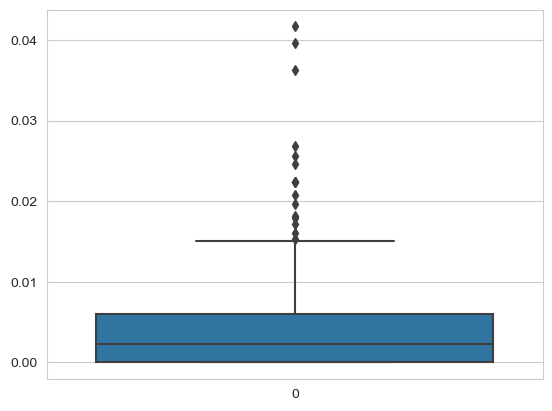

In [25]:
#outlier FabricStainRate values even after a tolerance amount is added, are being examined
sns.boxplot(data = dataFrame['FabricErrorRate'])

In [26]:
#outlier FabricErrorRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['FabricErrorRate'] > 0.03]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
10,6,0,2SP050,False,125,150,4,69,3,500,...,0.118812,41,4,10,3,22,0,5,44,65
44,13,0,2SP021,False,125,160,3,34,2,220,...,0.064516,14,0,4,1,9,0,0,14,16
115,9,0,2SP464,False,235,165,5,34,2,150,...,0.107143,9,1,1,0,7,0,0,9,18


<AxesSubplot: >

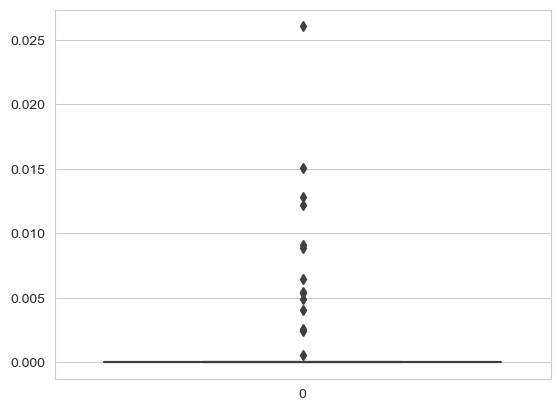

In [27]:
#A boxplot, to check the EmbroideryErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['EmbroideryErrorRate'])

In [28]:
#outlier EmbroideryErrorRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['EmbroideryErrorRate'] > 0.01]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
20,2,0,2SP050,False,125,150,3,52,3,220,...,0.029915,5,1,1,0,0,3,0,5,7
130,17,0,2RB201,False,175,120,4,34,2,300,...,0.018072,5,0,0,0,0,5,0,5,6
140,19,12,2RB201,False,175,120,4,33,3,170,...,0.036458,5,0,0,0,0,5,0,5,7
144,8,11,2SP033,False,190,170,4,33,2,150,...,0.054878,3,0,1,0,0,2,0,3,9


<AxesSubplot: >

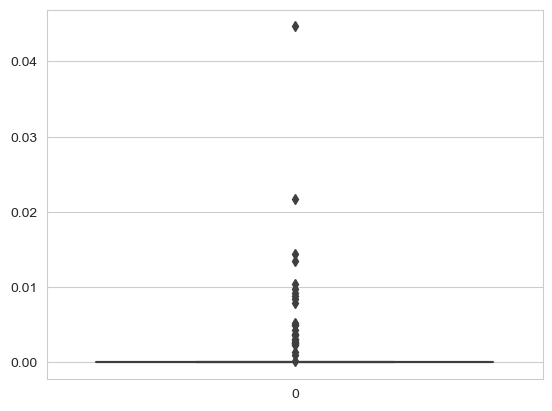

In [29]:
#A boxplot, to check the MeasureErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['MeasureErrorRate'])

In [30]:
#outlier MeasureErrorRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['MeasureErrorRate'] > 0.02]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
157,8,12,2SP033,False,190,170,7,28,2,200,...,0.102679,17,0,2,0,5,0,10,17,23
168,32,17,2SP033,False,190,170,4,44,3,205,...,0.043478,8,0,3,0,0,0,5,8,10


<AxesSubplot: >

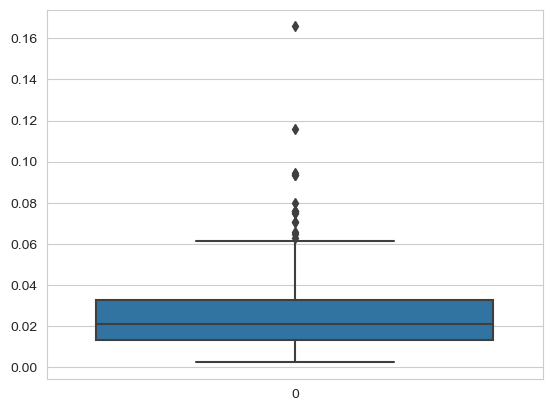

In [31]:
#A boxplot, to check the SecondQualityRate distribution is being plotted
sns.boxplot(data = dataFrame['SecondQualityRate'])

In [32]:
#outlier SecondQualityRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['SecondQualityRate'] > 0.08]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
53,8,4,2SP021,False,125,160,9,36,2,225,...,0.108374,24,0,18,0,4,2,2,26,27
55,8,4,2SP021,False,125,160,9,31,2,250,...,0.165803,50,0,38,5,7,0,2,52,50
149,17,11,2SP033,False,190,170,4,36,3,160,...,0.135135,17,0,11,2,3,0,3,19,24
156,32,12,2SP033,False,190,170,7,28,2,200,...,0.133929,21,0,14,2,5,0,0,21,30
167,5,16,2SP033,False,190,170,3,28,2,215,...,0.136364,29,9,18,3,2,0,0,32,34


<AxesSubplot: >

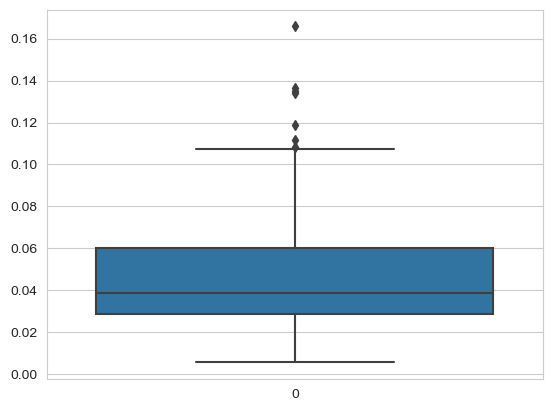

In [33]:
#A boxplot, to check the DefectRate distribution is being plotted
sns.boxplot(data = dataFrame['DefectRate'])

Since the number of data is small, the outliers are not clearly defined and used with tolerance.

However, since the outliers in the input values are too many, only the output features that will that will cause problems will be removed.

Since the ratios other than DefectRate and SecondQualityRate are mostly 0, the outliers of these features also correspond to a large number of data.

only the outlier values for DefectRate and SecondQualityRate will be removed with some tolerance so that the number of data is not reduced much.

Also, since DefectRate and SecondQualityRate values contain other ratios, removed rows also will clear the outlier values of the other ratios a little.

This process will at least prevent the fact that the features to be predicted are very outlier and will increase the quality of training.

In [34]:
#outlier DefectRate values even after a tolerance amount is added, are being examined
dataFrame[dataFrame['DefectRate'] > 0.13]

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
55,8,4,2SP021,False,125,160,9,31,2,250,...,0.165803,50,0,38,5,7,0,2,52,50
149,17,11,2SP033,False,190,170,4,36,3,160,...,0.135135,17,0,11,2,3,0,3,19,24
156,32,12,2SP033,False,190,170,7,28,2,200,...,0.133929,21,0,14,2,5,0,0,21,30
167,5,16,2SP033,False,190,170,3,28,2,215,...,0.136364,29,9,18,3,2,0,0,32,34


In [35]:
#Rows with outlier DefectRate  even after a tolerance amount is added, are removed from the dataFrame
dataFrame = dataFrame[dataFrame['DefectRate'] <= 0.13]
dataFrame

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
0,18,0,2SP050,False,125,150,4,35,3,375,...,0.064198,6,4,0,1,1,0,0,6,25
1,19,0,2SP050,False,125,150,4,65,3,375,...,0.060386,3,0,2,1,0,0,0,3,23
2,6,0,2SP050,False,125,150,4,65,3,375,...,0.077121,11,1,5,2,1,1,1,11,30
3,20,0,2SP050,False,125,150,4,65,3,375,...,0.062802,8,0,4,2,2,0,0,8,25
4,2,0,2SP050,False,125,150,4,65,3,375,...,0.045894,3,0,3,0,0,0,0,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,42,6,2SP206,False,175,180,4,610,14,6000,...,0.032400,127,80,29,8,7,4,0,128,199
201,44,22,2RB020,False,210,125,2,75,3,610,...,0.030837,20,11,8,1,1,0,0,21,20
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87
203,37,20,2FT052,False,320,190,13,145,5,1545,...,0.012865,8,2,6,0,0,0,0,8,20


<AxesSubplot: >

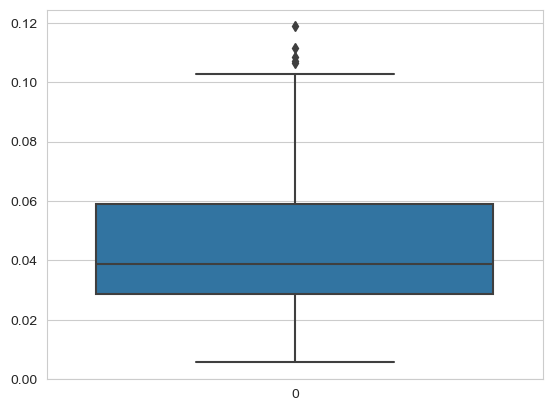

In [36]:
#A boxplot, to check the DefectRate distribution is being plotted
sns.boxplot(data = dataFrame['DefectRate'])

In [37]:
#Rows with outlier SecondQualityRate  even after a tolerance amount is added, are removed from the dataFrame
dataFrame = dataFrame[dataFrame['SecondQualityRate'] <= 0.08]
dataFrame

,ColorID,ProductDetailID,FabricCode,IsManualProcess,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
0,18,0,2SP050,False,125,150,4,35,3,375,...,0.064198,6,4,0,1,1,0,0,6,25
1,19,0,2SP050,False,125,150,4,65,3,375,...,0.060386,3,0,2,1,0,0,0,3,23
2,6,0,2SP050,False,125,150,4,65,3,375,...,0.077121,11,1,5,2,1,1,1,11,30
3,20,0,2SP050,False,125,150,4,65,3,375,...,0.062802,8,0,4,2,2,0,0,8,25
4,2,0,2SP050,False,125,150,4,65,3,375,...,0.045894,3,0,3,0,0,0,0,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,42,6,2SP206,False,175,180,4,610,14,6000,...,0.032400,127,80,29,8,7,4,0,128,199
201,44,22,2RB020,False,210,125,2,75,3,610,...,0.030837,20,11,8,1,1,0,0,21,20
202,37,20,2FT052,False,320,190,13,340,9,3780,...,0.022381,67,36,24,0,4,0,4,68,87
203,37,20,2FT052,False,320,190,13,145,5,1545,...,0.012865,8,2,6,0,0,0,0,8,20


<AxesSubplot: >

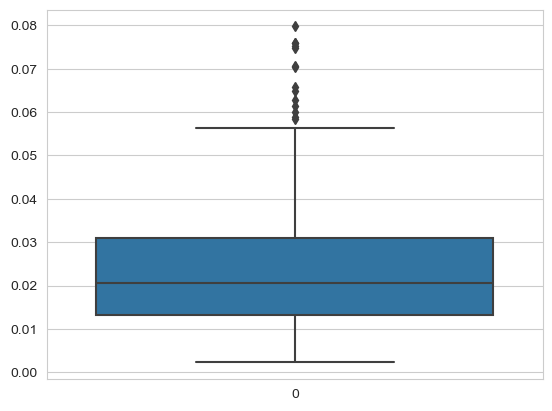

In [38]:
#A boxplot, to check the SecondQualityRate distribution is being plotted
sns.boxplot(data = dataFrame['SecondQualityRate'])

<AxesSubplot: >

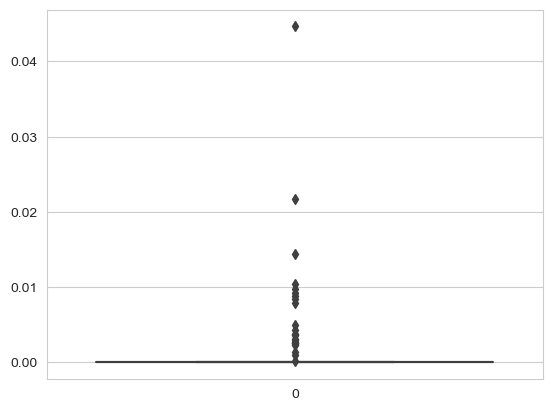

In [39]:
#A boxplot, to check the MeasureErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['MeasureErrorRate'])

<AxesSubplot: >

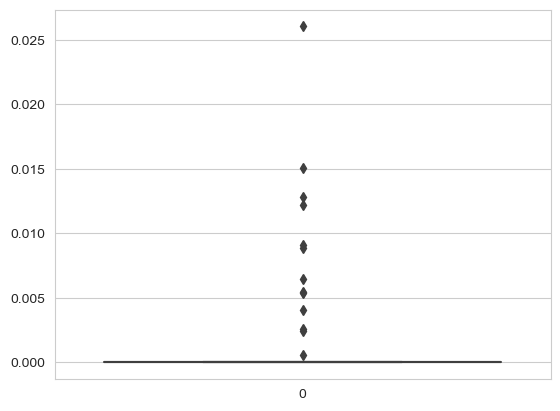

In [40]:
#A boxplot, to check the EmbroideryErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['EmbroideryErrorRate'])

<AxesSubplot: >

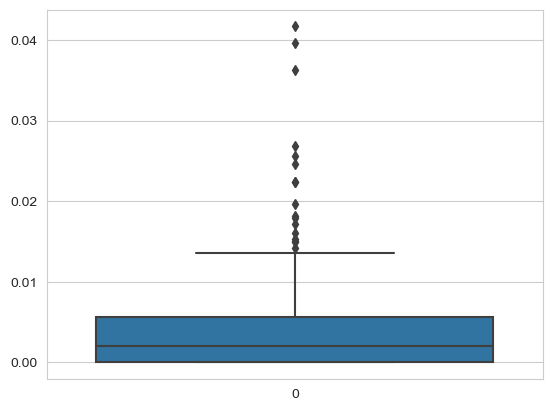

In [41]:
#A boxplot, to check the FabricErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['FabricErrorRate'])

<AxesSubplot: >

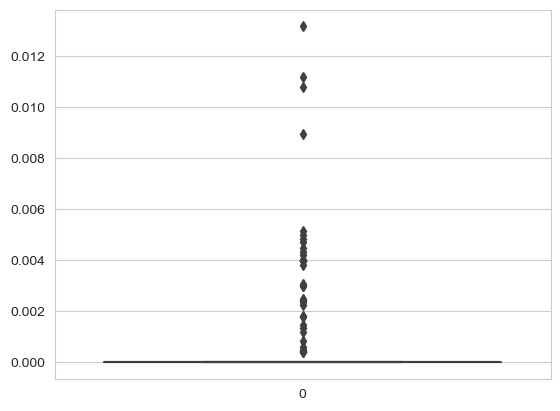

In [42]:
#A boxplot, to check the FabricStainRate distribution is being plotted
sns.boxplot(data = dataFrame['FabricStainRate'])

<AxesSubplot: >

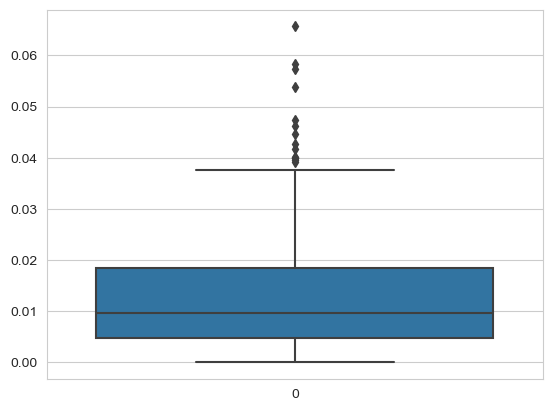

In [43]:
#A boxplot, to check the SewingErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['SewingErrorRate'])

<AxesSubplot: >

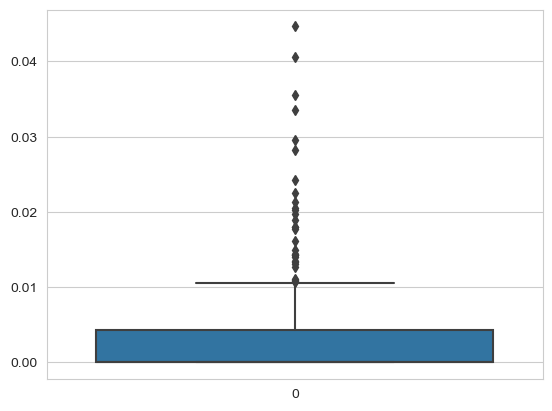

In [44]:
#A boxplot, to check the PrintErrorRate distribution is being plotted
sns.boxplot(data = dataFrame['PrintErrorRate'])

In [45]:
#Information of dataframe is being printed
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 204
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ColorID                  200 non-null    int64  
 1   ProductDetailID          200 non-null    int64  
 2   FabricCode               200 non-null    object 
 3   IsManualProcess          200 non-null    bool   
 4   Weight                   200 non-null    int64  
 5   Width                    200 non-null    int64  
 6   ProductPart              200 non-null    int64  
 7   NotchLayer               200 non-null    int64  
 8   NotchQuantity            200 non-null    int64  
 9   OrderQuantity            200 non-null    int64  
 10  PrintErrorRate           200 non-null    float64
 11  SewingErrorRate          200 non-null    float64
 12  FabricStainRate          200 non-null    float64
 13  FabricErrorRate          200 non-null    float64
 14  EmbroideryErrorRate      2

In [46]:
#Statistical information of dataframe is being printed
dataFrame.describe()

,ColorID,ProductDetailID,Weight,Width,ProductPart,NotchLayer,NotchQuantity,OrderQuantity,PrintErrorRate,SewingErrorRate,...,DefectRate,SecondQuality,PrintError,SewingError,FabricStain,FabricError,EmbroideryError,MeasureError,CalculatedSecondQuality,Defect
count,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,16.785000,6.25500,171.500000,161.170000,4.86500,64.715000,2.870000,528.550000,0.003928,0.014236,...,0.044340,14.045000,4.605000,6.440000,0.485000,2.150000,0.235000,0.390000,14.305000,21.880000
std,11.893952,7.08881,45.514921,17.042987,2.42615,73.758902,1.582918,814.789116,0.007938,0.013029,...,0.023203,27.749109,17.502016,8.555253,1.782036,4.618893,1.271953,1.359094,27.981005,33.984856
min,0.000000,0.00000,125.000000,120.000000,2.00000,0.000000,0.000000,150.000000,0.000000,0.000000,...,0.005587,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5.000000,0.00000,125.000000,150.000000,4.00000,33.000000,2.000000,210.000000,0.000000,0.004728,...,0.028531,4.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000
50%,16.000000,3.00000,175.000000,165.000000,4.00000,44.000000,3.000000,280.000000,0.000000,0.009694,...,0.038528,7.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,7.000000,14.000000
75%,26.000000,12.00000,190.000000,172.000000,5.00000,67.000000,3.000000,405.000000,0.004285,0.018410,...,0.058106,12.000000,2.000000,8.000000,0.000000,2.000000,0.000000,0.000000,12.250000,20.000000
max,47.000000,23.00000,320.000000,195.000000,14.00000,610.000000,14.000000,6000.000000,0.044643,0.065657,...,0.118812,302.000000,195.000000,86.000000,19.000000,43.000000,15.000000,10.000000,303.000000,353.000000


In [47]:
#dataFrame is being saved as pkl files
dataFrame.to_pickle("../Data/FinalPreparation/FabricWaste.pkl")